In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class  
import math
from scipy import stats

In [2]:
Tcmb = 2.7255 #2.726
relative_bulk_velocity = 30.

n_power_1 = 0
dm_mass_1 =  0 #GeV
sigma_dmb_1 = 0
l_1 = 5000

n_power_2 = 0
dm_mass_2 =  1 #GeV
sigma_dmb_2 = 8.8e-27

n_power_3 = 0
dm_mass_3 =  0 #GeV
sigma_dmb_3 = 0
l_2 = 5000

n_power_4 = 0
dm_mass_4 =  1 #GeV
sigma_dmb_4 = 1.7e-25 

In [3]:
params_1 = {'output': 'tCl pCl lCl','l_max_scalars': l_1,'lensing': 'no',
                    'omega_dmb': 0.12,'h': 0.6730804,'omega_b': 0.0224,'A_s': 2.2e-9,
                    'n_s': 0.96,'tau_reio': 0.07,'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_1,'n_dmb': n_power_1,'sigma_dmb': sigma_dmb_1,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611, 'Vrel_dmb': relative_bulk_velocity
           }

    
params_2 = {'output': 'tCl pCl lCl','l_max_scalars': l_1,'lensing': 'no',
                    'omega_dmb': 0.12,'h': 0.6730804,'omega_b': 0.0224,'A_s': 2.2e-9,'n_s': 0.96,
                    'tau_reio': 0.07,'omega_cdm' :1e-22,'m_dmb': dm_mass_2,'n_dmb': n_power_2,'sigma_dmb': sigma_dmb_2,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611, 'Vrel_dmb': relative_bulk_velocity
           }

M1 = Class()
M1.set(params_1)
M1.compute()
cl_tot_1 = M1.raw_cl(5000)
M1.struct_cleanup()
M1.empty()
cl_TT_1 = cl_tot_1['tt']
cl_EE_1 = cl_tot_1['ee']
ell_1 = cl_tot_1['ell']

Cl_est_kk1 = []
for i in ell_1:
    if i < 2:
        Cl_est_kk1.append(0)
    else:
        Cl_est_kk1.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_1['pp'][i])
Cl_kk_1 = np.array(Cl_est_kk1)

M2 = Class()
M2.set(params_2)
M2.compute()
cl_tot_2 = M2.raw_cl(l_1)
M2.struct_cleanup()
M2.empty()
cl_TT_2 = cl_tot_2['tt']
cl_EE_2 = cl_tot_2['ee']
ell_2 = cl_tot_2['ell']

Cl_est_kk2 = []
for i in ell_2:
    if i < 2:
        Cl_est_kk2.append(0)
    else:
        Cl_est_kk2.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_2['pp'][i])
Cl_kk_2 = np.array(Cl_est_kk2)

In [4]:
params_3 = {'output': 'tCl pCl lCl','l_max_scalars': l_2,'lensing': 'no',
                    'omega_dmb': 0.12,'h': 0.6730804,'omega_b': 0.0224,'A_s': 2.2e-9,'n_s': 0.96,'tau_reio': 0.07,'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_3,'n_dmb': n_power_3,'sigma_dmb': sigma_dmb_3,'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611, 'Vrel_dmb': relative_bulk_velocity
           }
    
params_4 = {'output': 'tCl pCl lCl','l_max_scalars': l_2,'lensing': 'no',
                    'omega_dmb': 0.12,'h': 0.6730804,'omega_b': 0.0224,'A_s': 2.2e-9,'n_s': 0.96,'tau_reio': 0.07,'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_4,'n_dmb': n_power_4,'sigma_dmb': sigma_dmb_4,'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611, 'Vrel_dmb': relative_bulk_velocity
           }

M3 = Class()
M3.set(params_3)
M3.compute()
cl_tot_3 = M3.raw_cl(l_2)
M3.struct_cleanup()
M3.empty()
cl_TT_3 = cl_tot_3['tt']
cl_EE_3 = cl_tot_3['ee']
ell_3 = cl_tot_3['ell']

Cl_est_kk3 = []
for i in ell_3:
    if i < 2:
        Cl_est_kk3.append(0)
    else:
        Cl_est_kk3.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_3['pp'][i])
Cl_kk_3 = np.array(Cl_est_kk3)

M4 = Class()
M4.set(params_4)
M4.compute()
cl_tot_4 = M4.raw_cl(l_2)
M4.struct_cleanup()
M4.empty()
cl_TT_4 = cl_tot_4['tt']
cl_EE_4 = cl_tot_4['ee']
ell_4 = cl_tot_4['ell']

Cl_est_kk4 = []
for i in ell_4:
    if i < 4:
        Cl_est_kk4.append(0)
    else:
        Cl_est_kk4.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*cl_tot_4['pp'][i])      
Cl_kk_4 = np.array(Cl_est_kk4)

# NOISE:

In [5]:
#----------------------- CV LIMITED NOISE -----------------------#
kk_cvlimited = np.genfromtxt('noise/cv-limited/lensing_cv.txt',
                     dtype=None,
                     delimiter='') #uK^2

Nl_kk_cvlimited = kk_cvlimited #/(1.0e6*Tcmb)**2 #unitless
#nl_kk_3000 = a[2] #/((1.0e6*Tcmb)**2)
nl_kk_cvlimited = [1e100 for i in range(0, 5001, 1)]
nl_kk_cvlimited[0:4001] = Nl_kk_cvlimited

In [35]:
#----------------------- S4 NOISE -----------------------#
a_S4 = np.load('noise/CMB_S4_noise.npy') #[uK^]2
#nl_kk_S4 = a_S4[2] #/((1.0e6*Tcmb)**2)
nl_kk_S4 = [1e100 for i in range(0, 5001, 1)]
nl_kk_S4[0:2501] = a_S4[2]

data_s4 = np.genfromtxt('noise/noise_S4.csv',
                     dtype=None,
                     delimiter=',')

S4 = (np.array([list(i) for i in data_s4]))
nl_tt_S4 = S4[0]
nl_ee_S4 = S4[1]

In [36]:
nl_kk_S4

[1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 1e+100,
 5.931663753930954e-09,
 5.936394219797634e-09,
 5.941124685664315e-09,
 5.945855151530996e-09,
 5.9505856173976755e-09,
 5.955316083264356e-09,
 5.960046549131036e-09,
 5.964777014997717e-09,
 5.969507480864397e-09,
 5.974237946731077e-09,
 5.978968412597757e-09,
 5.983

In [32]:
a_S4[2]

array([1.00000000e+100, 1.00000000e+100, 1.00000000e+100, ...,
       3.33856093e-008, 3.34163095e-008, 3.34470096e-008])

In [21]:
#----------------------- SO (baseline)  -----------------------#
data = np.genfromtxt('noise/SO/Apr17_mv_nlkk_deproj0_SENS1_fsky_16000_iterOn.csv',
                     dtype=None,
                     delimiter='')
noise_dat = np.transpose(data)
n_kk_3000 = noise_dat[1]

data2 = np.genfromtxt('noise/SO/SO_LAT_Nell_T_atmv1_baseline_fsky0p4_ILC_CMB.txt',
                     dtype=None,
                     delimiter=' ')
data3 = np.genfromtxt('noise/SO/SO_LAT_Nell_P_baseline_fsky0p4_ILC_CMB_B.txt',
                     dtype=None,
                     delimiter=' ')
noise_T = np.transpose(np.array([list(i) for i in data2]))
noise_P = np.transpose(np.array([list(i) for i in data3]))

#n_kk_3000 = noise_dat2[1]
# ells, N_lensing_TT, N_lensing_TE, N_lensing_EE, N_lensing_TB, N_lensing_EB, N_lensing_Pol (EE+EB), N_lensing_MV (all), N_curl_TT, N_curl_TE, N_curl_EE, N_curl_TB, N_curl_EB, N_curl_Pol (EE+EB), N_curl_MV (all)
nl_tt_so = [1e100 for i in range(0,5001, 1)]
nl_tt_so[300:5001] = noise_T[1][300-40:5001-40]/((1.0e6*Tcmb)**2)

nl_ee_so = [1e100 for i in range(0,5001, 1)]
nl_ee_so[100:5001] = noise_P[1][100-40:5001-40]/((1.0e6*Tcmb)**2)

nl_kk_so = [1e100 for i in range(0, 5001, 1)]
nl_kk_so[20:3000] = noise_dat[1]

In [22]:
#----------------------- Planck noise -----------------------#
#reading each line from file and replacing "-" by ","


plancknoise = np.load('noise/Planck_noise.npy')
nl_kk_planck = plancknoise[2]

data_planck = np.genfromtxt('noise/noise_planck.csv',
                     dtype=None,
                     delimiter=',')

planck = (np.array([list(i) for i in data_planck]))
nl_tt_planck = planck[0]
nl_ee_planck = planck[1]

# Plotting the noise curves:

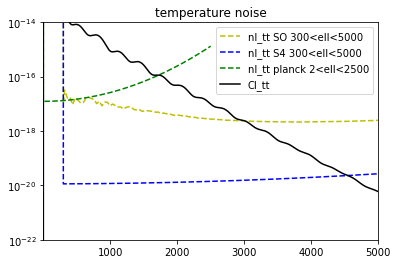

In [23]:
#----------------------- TEMPERATURE -----------------------#
plt.plot(nl_tt_so , 'y--',label="nl_tt SO 300<ell<5000")
plt.plot(nl_tt_S4 , 'b--',label="nl_tt S4 300<ell<5000")
plt.plot(nl_tt_planck , 'g--',label="nl_tt planck 2<ell<2500")
plt.plot(cl_TT_2, 'k-',label="Cl_tt")
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1e-22,1e-14)
plt.xlim(2,5000)
plt.legend(loc="upper right")
plt.title('temperature noise')
plt.show()

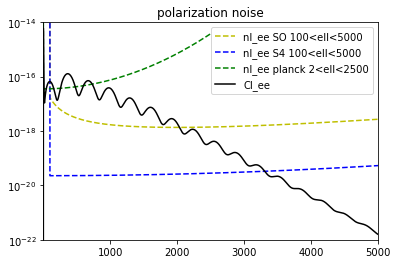

In [27]:
#----------------------- POLARIZATION -----------------------#
plt.plot(nl_ee_so , 'y--',label="nl_ee SO 100<ell<5000")
plt.plot(nl_ee_S4 , 'b--',label="nl_ee S4 100<ell<5000")
plt.plot(nl_ee_planck , 'g--',label="nl_ee planck 2<ell<2500")
plt.plot(cl_EE_2, 'k-',label="Cl_ee")
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1e-22,1e-14)
plt.xlim(2,5000)
plt.legend(loc="upper right")
plt.title('polarization noise')
plt.show()

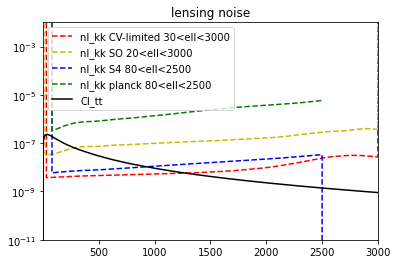

In [29]:
#----------------------- LENSING -----------------------#
plt.plot(nl_kk_cvlimited , 'r--',label="nl_kk CV-limited 30<ell<3000")
plt.plot(nl_kk_so , 'y--',label="nl_kk SO 20<ell<3000")
plt.plot(nl_kk_S4 , 'b--',label="nl_kk S4 80<ell<2500")
plt.plot(nl_kk_planck , 'g--',label="nl_kk planck 80<ell<2500")
plt.plot(Cl_kk_2, 'k-',label="Cl_tt")

plt.yscale('log')
#plt.xscale('log')
plt.ylim(1e-11,1e-2)
plt.xlim(2,3000)
plt.legend(loc="upper left")
plt.title('lensing noise')
plt.show()

# Error bars: 
## Planck

In [12]:
theta_fwhm_planck = 7.0 #for PLANCK  - arcmin
sigma_b_planck = (theta_fwhm_planck*0.00742) /60
W_l_planck = np.exp(- ((ell_1[2:2501]**2)*(sigma_b_planck**2) / 2) )#window function 
inv_w_x_planck = 33. # mK-arcmin
            #inverse statistical weights per unit solid angle, 
            #a measure of experimental sensitivity independent of pixel size 

        
e_tt_p_planck = np.sqrt(
(2/(2*ell_1[2:2501] +1))*(cl_TT_1[2:2501] + inv_w_x_planck/(W_l_planck*W_l_planck))**2
)

e_ee_p_planck =np.sqrt(
    (2 /(2*ell_1[2:2501] +1))   *   (((cl_EE_1[2:2501] + ((56/33)*inv_w_x_planck/(W_l_planck**2))))**2))

#------------------------------------------ BINNING: ----------------------------------------------#

bin_e_tt_p_planck = []

sum_i =0
for n, i in enumerate(e_tt_p_planck):
    if n %50 == 0 and n < 0:
        bin_e_tt_p_planck.append(0)        
        sum_i = 0        
    if n %50 == 0 and n > 0:
        bin_e_tt_p_planck.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i

'''sum_i =0
for n, i in enumerate(e_tt_p_planck[0:5000]):
    if n %50 == 0:
        bin_e_tt_p_planck.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i'''
    
bin_e_ee_p_planck = []
sum_i =0
for n, i in enumerate(e_ee_p_planck):
    if n %50 == 0 and n < 0:
        bin_e_ee_p_planck.append(0)        
        sum_i = 0        
    if n %50 == 0 and n > 0:
        bin_e_ee_p_planck.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i
'''sum_i =0
for n, i in enumerate(e_ee_p_planck[2:2500]):
    if n %49 == 0:
        bin_e_ee_p_planck.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i
'''

e_tt_p_planck2 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_tt_planck)**2+cl_TT_1[0:2501]**2) / np.sqrt((2*ell_1[0:2501]+1)/2. * 0.65))  /cl_TT_1[0:2501]
e_ee_p_planck2 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_ee_planck)**2+cl_EE_1[0:2501]**2) / np.sqrt((2*ell_1[0:2501]+1)/2. * 0.65))  /cl_EE_1[0:2501]

e_kk_p_planck2 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_planck)**2+Cl_kk_1[0:2501]**2) / np.sqrt((2*ell_1[0:2501]+1)/2. * 0.6))  /Cl_kk_1[0:2501]




<ipython-input-12-8462e21980d0>:55: RuntimeWarning: divide by zero encountered in true_divide
  e_tt_p_planck2 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_tt_planck)**2+cl_TT_1[0:2501]**2) / np.sqrt((2*ell_1[0:2501]+1)/2. * 0.65))  /cl_TT_1[0:2501]
<ipython-input-12-8462e21980d0>:56: RuntimeWarning: divide by zero encountered in true_divide
  e_ee_p_planck2 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_ee_planck)**2+cl_EE_1[0:2501]**2) / np.sqrt((2*ell_1[0:2501]+1)/2. * 0.65))  /cl_EE_1[0:2501]
<ipython-input-12-8462e21980d0>:58: RuntimeWarning: divide by zero encountered in true_divide
  e_kk_p_planck2 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_planck)**2+Cl_kk_1[0:2501]**2) / np.sqrt((2*ell_1[0:2501]+1)/2. * 0.6))  /Cl_kk_1[0:2501]


## Simons Observatory:

In [13]:
e_tt_p_so = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_tt_so)**2+cl_TT_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /cl_TT_1
e_ee_p_so = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_ee_so)**2+cl_EE_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /cl_EE_1
e_kk_p_so = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_so)**2+Cl_kk_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /Cl_kk_1


#BINNING:
bin_e_tt_p_so = []

sum_i =0
for n, i in enumerate(e_tt_p_so[0:5001]):
    if n %49 == 0:
        bin_e_tt_p_so.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i
    
bin_e_ee_p_so = []
sum_i =0
for n, i in enumerate(e_ee_p_so[0:5001]):
    if n %49 == 0:
        bin_e_ee_p_so.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i


<ipython-input-13-4bc84c29aa52>:1: RuntimeWarning: divide by zero encountered in true_divide
  e_tt_p_so = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_tt_so)**2+cl_TT_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /cl_TT_1
<ipython-input-13-4bc84c29aa52>:2: RuntimeWarning: divide by zero encountered in true_divide
  e_ee_p_so = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_ee_so)**2+cl_EE_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /cl_EE_1
<ipython-input-13-4bc84c29aa52>:3: RuntimeWarning: divide by zero encountered in true_divide
  e_kk_p_so = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_so)**2+Cl_kk_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /Cl_kk_1


## CMB Stage-4

In [14]:
#error bars with 1mK-arc min noise and 1.5 arcmin beam full-width half maximum (FWHM) for 2<l<2000
#binned in l with a bin width of dl=50.
#S4
theta_fwhm_s4 = 1.5 #for S4  - arcmin
sigma_b_s4 = (theta_fwhm_s4*0.00742) /60
W_l_s4 = np.exp(- ((ell_1**2)*(sigma_b_s4**2) / 2) )#window function 
inv_w_x_s4 = 1 # mK-arcmin
            #inverse statistical weights per unit solid angle, 
            #a measure of experimental sensitivity independent of pixel size 
e_tt_p_s4 =np.sqrt(
    (2 /(2*ell_1 +1))   *   (((cl_TT_1 + (inv_w_x_s4/(W_l_s4**2))))**2))
e_ee_p_s4 =np.sqrt(
    (2 /(2*ell_1 +1))   *   (((cl_EE_1 + ((np.sqrt(1)*inv_w_x_s4)/(W_l_s4**2))))**2))

e_kk_p_s4 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_S4)**2+Cl_kk_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /Cl_kk_1

#BINNING:
bin_e_tt_p_s4 = []

sum_i =0
for n, i in enumerate(e_tt_p_s4):
    if n %50 == 0 and n < 0:
        bin_e_tt_p_s4.append(0)        
        sum_i = 0        
    elif n %50 == 0 and n >= 0:
        bin_e_tt_p_s4.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i
    
bin_e_ee_p_s4 = []

sum_i =0
for n, i in enumerate(e_ee_p_s4):
    if n %50 == 0 and n < 0:
        bin_e_ee_p_s4.append(0)        
        sum_i = 0        
    if n %50 == 0 and n > 0:
        bin_e_ee_p_s4.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i
    
'''bin_e_ee_p_s4 = []
sum_i =0
for n, i in enumerate(e_ee_p_s4[3:3001]):
    if n %49 == 0:
        bin_e_ee_p_s4.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i'''
'''    
bin_e_kk_p = []

for n, i in enumerate(e_kk_p[3:3000]):
    if n %49 == 0:
        bin_e_kk_p.append(1.0* sum_i / 50)        
        sum_i = 0
    sum_i += i'''

<ipython-input-14-ca6562a37d26>:15: RuntimeWarning: divide by zero encountered in true_divide
  e_kk_p_s4 = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_S4)**2+Cl_kk_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /Cl_kk_1


'    \nbin_e_kk_p = []\n\nfor n, i in enumerate(e_kk_p[3:3000]):\n    if n %49 == 0:\n        bin_e_kk_p.append(1.0* sum_i / 50)        \n        sum_i = 0\n    sum_i += i'

## CV-Limited:

In [15]:
e_kk_p_cvlimited = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_cvlimited)**2+Cl_kk_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /Cl_kk_1


<ipython-input-15-f450e3630c86>:1: RuntimeWarning: divide by zero encountered in true_divide
  e_kk_p_cvlimited = (100*1./np.sqrt(50.))* (np.sqrt(np.array(nl_kk_cvlimited)**2+Cl_kk_1**2) / np.sqrt((2*ell_1+1)/2. * 0.4))  /Cl_kk_1


# RESIDUAL PLOTS W/ error bars
## Temperature:

<ipython-input-16-9045cde92d43>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( 100*(cl_TT_2 - cl_TT_1) /cl_TT_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)),linewidth=4)


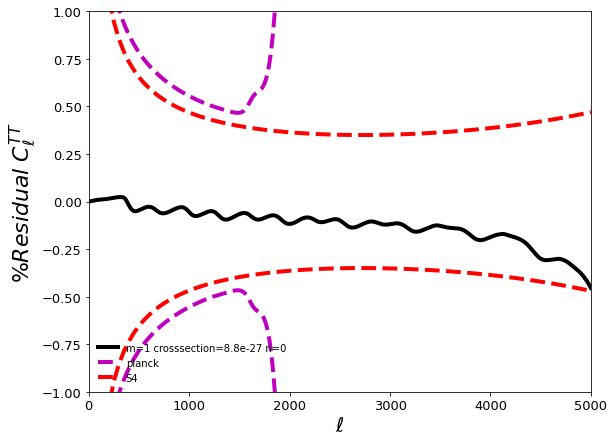

In [16]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( 100*(cl_TT_2 - cl_TT_1) /cl_TT_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)),linewidth=4)
#plt.plot( -100*(cl_TT_4 - cl_TT_3) /cl_TT_3,'b-',label="m={} crosssection={} n={} ".format(str(dm_mass_4),str(sigma_dmb_4),str(n_power_4)),linewidth=4)


#plt.plot(e_tt_p_so, 'g--',linewidth=4,label="SO")
#plt.plot(-e_tt_p_so, 'g--',linewidth=4)

plt.plot(e_tt_p_planck2, 'm--',linewidth=4,label="planck")
plt.plot(-e_tt_p_planck2, 'm--',linewidth=4)
#plt.plot(ell_1,100*(e_tt_p_s4/np.sqrt(50)), 'r--', label="S4")
#plt.plot(ell_1,-100*(e_tt_p_s4/np.sqrt(50)), 'r--')
#plt.plot(ell_1,100*(e_tt_p_planck/np.sqrt(50)), 'm-', label="planck")
#plt.plot(ell_1,-100*(e_tt_p_planck/np.sqrt(50)), 'm-')
plt.plot([i* 50 for i in range(len(bin_e_tt_p_s4))][1:], 100*(bin_e_tt_p_s4[1:]/np.sqrt(50)), 'r--',linewidth=4,label="S4")
plt.plot([i* 50 for i in range(len(bin_e_tt_p_s4))][1:], -100*(bin_e_tt_p_s4[1:]/np.sqrt(50)), 'r--',linewidth=4)

#plt.plot([i* 50 for i in range(len(bin_e_tt_p_so))], (bin_e_tt_p_so/np.sqrt(1)), 'g--',linewidth=4,label="SO")
#plt.plot([i* 50 for i in range(len(bin_e_tt_p_so))], -(bin_e_tt_p_so/np.sqrt(1)), 'g--',linewidth=4)

plt.ylabel(r'$\%  Residual    \ C_{\ell}^{TT}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
#plt.xscale('log')
plt.xlim([0, 5000])
plt.ylim(-1,1)

plt.show()
#fig.savefig("fisher_plots/residual_CL_TT_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))


# Polarization:

<ipython-input-17-9ddefcc2f748>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( -100*(cl_EE_2 - cl_EE_1) /cl_EE_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)),linewidth=4)


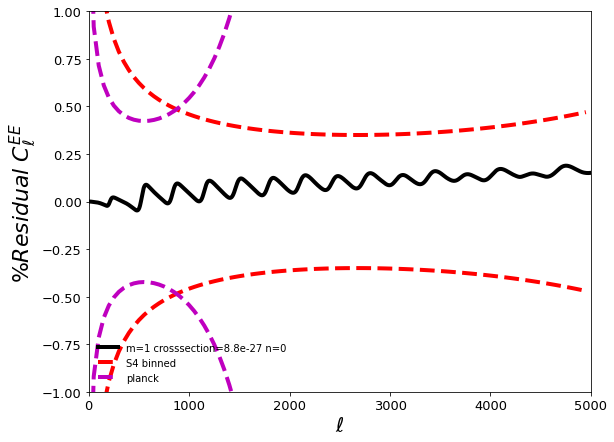

In [17]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot( -100*(cl_EE_2 - cl_EE_1) /cl_EE_1,'k-',label="m={} crosssection={} n={} ".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)),linewidth=4)
#plt.plot( -100*(cl_EE_4 - cl_EE_3) /cl_EE_3,'b-',label="m={} crosssection={} n={} ".format(str(dm_mass_4),str(sigma_dmb_4),str(n_power_4)),linewidth=4)

#plt.plot(e_ee_p_so, 'g--', label="SO")
#plt.plot(-e_ee_p_so, 'g--')
#plt.plot([i* 50 for i in range(len(bin_e_ee_p_so))], (bin_e_ee_p_so/np.sqrt(1)), 'g--',linewidth=4,label="SO")
#plt.plot([i* 50 for i in range(len(bin_e_ee_p_so))], -(bin_e_ee_p_so/np.sqrt(1)), 'g--',linewidth=4)

#plt.plot(ell_1,100*(e_ee_p_s4/np.sqrt(50)), 'r--', label="S4")
#plt.plot(ell_1,-100*(e_ee_p_s4/np.sqrt(50)), 'r--')
plt.plot([i* 50 for i in range(len(bin_e_ee_p_s4))][1:], 100*(bin_e_ee_p_s4[1:]/np.sqrt(50)), 'r--',linewidth=4,label="S4 binned")
plt.plot([i* 50 for i in range(len(bin_e_ee_p_s4))][1:], -100*(bin_e_ee_p_s4[1:]/np.sqrt(50)), 'r--',linewidth=4)

plt.plot([i* 50 for i in range(len(bin_e_ee_p_planck))], (bin_e_ee_p_planck/np.sqrt(50)), 'm--',linewidth=4,label="planck")
plt.plot([i* 50 for i in range(len(bin_e_ee_p_planck))], -(bin_e_ee_p_planck/np.sqrt(50)), 'm--',linewidth=4)

#plt.plot(e_ee_p_planck2, 'm--',linewidth=4,label="Planck")
#plt.plot(-e_ee_p_planck2, 'm--',linewidth=4)
#plt.plot(e_ee_p_so, 'g--',linewidth=4,label="SO")
#plt.plot(-e_ee_p_so, 'g--',linewidth=4)

plt.ylabel(r'$\%  Residual    \ C_{\ell}^{EE}$',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
plt.xlim([0, 5000])
plt.ylim(-1,1)

plt.show()
#fig.savefig("fisher_plots/residual_CL_EE_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))


# Lensing:

<ipython-input-18-4c65ad0030e7>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(- 100*(Cl_kk_1 - Cl_kk_2) /Cl_kk_1,'k-',label="m={} crosssection={} n={}".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)),linewidth=4)


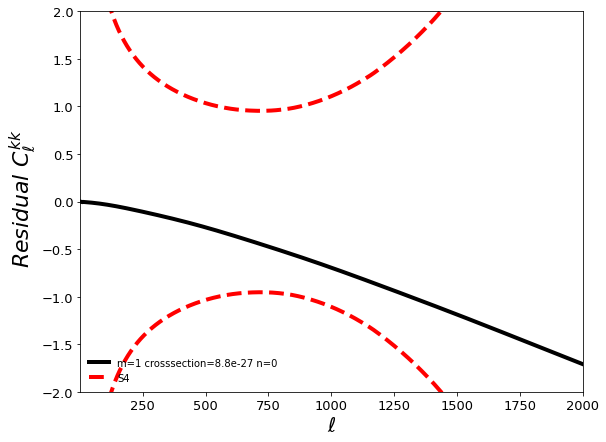

In [18]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(- 100*(Cl_kk_1 - Cl_kk_2) /Cl_kk_1,'k-',label="m={} crosssection={} n={}".format(str(dm_mass_2),str(sigma_dmb_2),str(n_power_2)),linewidth=4)
#plt.plot( -100*(Cl_kk_3 - Cl_kk_4) /Cl_kk_3,'b--',label="m={} crosssection={} n={}".format(str(dm_mass_4),str(sigma_dmb_4),str(n_power_4)),linewidth=4)

#plt.plot(e_kk_p_so, 'g--',linewidth=4)
#plt.plot(-e_kk_p_so, 'g--',label="SO",linewidth=4)
plt.plot(e_kk_p_s4, 'r--',linewidth=4)
plt.plot(-e_kk_p_s4, 'r--',label="S4",linewidth=4)
#plt.plot(e_kk_p_cvlimited, 'y--',linewidth=4)
#plt.plot(-e_kk_p_cvlimited, 'y--',label="CV-Limited",linewidth=4)
#plt.plot(e_kk_p_planck2, 'm--',linewidth=4)
#plt.plot(-e_kk_p_planck2, 'm--',label="planck",linewidth=4)



plt.ylabel(r'$\ Residual    \ C_{\ell}^{kk}$ ',size=22)
plt.xlabel(r'$\ell$',size=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower left', frameon=False)
plt.xlim([2, 2000])
plt.ylim(-2,2)

plt.show()
#fig.savefig("fisher_plots/residual_CL_kk_n={}_m={}_sigma_.png".format(str(n_power_2),str(dm_mass_2)))
